In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [16]:
df = pd.read_csv('Datasets/WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
Customer                         9134 non-null object
State                            9134 non-null object
Customer Lifetime Value          9134 non-null float64
Response                         9134 non-null object
Coverage                         9134 non-null object
Education                        9134 non-null object
Effective To Date                9134 non-null object
EmploymentStatus                 9134 non-null object
Gender                           9134 non-null object
Income                           9134 non-null int64
Location Code                    9134 non-null object
Marital Status                   9134 non-null object
Monthly Premium Auto             9134 non-null int64
Months Since Last Claim          9134 non-null int64
Months Since Policy Inception    9134 non-null int64
Number of Open Complaints        9134 non-null int64
Number of Policies               

In [84]:
df.head(3)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,CLV Segment,Policy Age Segment
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,Low,Low
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,High,Low
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,High,Low


## Overall Engagement Rate

In [19]:
df.groupby('Response').count()['Customer']

Response
No     7826
Yes    1308
Name: Customer, dtype: int64

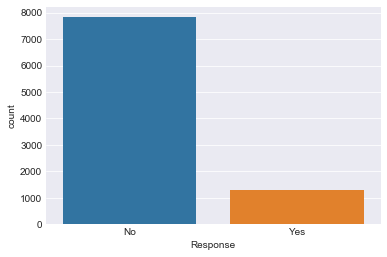

In [20]:
sns.set_style('darkgrid')
sns.countplot(x = 'Response', data = df)

In [21]:
df.groupby('Response').count()['Customer']/df.shape[0]

Response
No     0.856799
Yes    0.143201
Name: Customer, dtype: float64

we can see that only about 14% of the customers responded to the marketing calls.

## Engagement Rates by Offer Type

In [23]:
by_offer_type_df = df.loc[
df['Response'] == 'Yes', # count only engaged customers
].groupby([
'Renew Offer Type'# engaged customers grouped by renewal offer type
]).count()['Customer'] / df.groupby('Renew Offer Type').count()['Customer']
by_offer_type_df

Renew Offer Type
Offer1    0.158316
Offer2    0.233766
Offer3    0.020950
Offer4         NaN
Name: Customer, dtype: float64

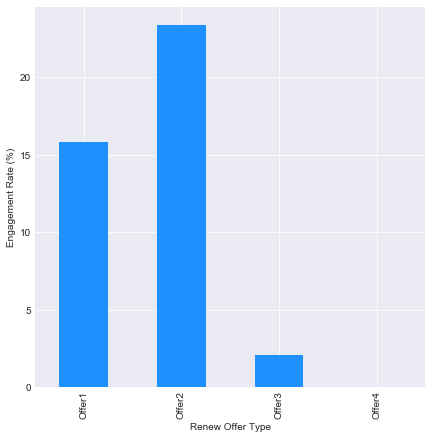

In [25]:
ax = (by_offer_type_df*100.0).plot(
kind='bar',
figsize=(7, 7),
color='dodgerblue',
grid=True
)
ax.set_ylabel('Engagement Rate (%)')
plt.show()

Offer 2 had the highest engagement rate among the customers

## Engagement Rates by Offer Type and Vehicle class

In [27]:
by_offer_type_df = df.loc[
df['Response'] == 'Yes' # engaged customers
].groupby([
'Renew Offer Type', 'Vehicle Class' # grouping the data by these two columns
]).count()['Customer'] / df.groupby('Renew Offer Type').count()['Customer']# rates for
by_offer_type_df

Renew Offer Type  Vehicle Class
Offer1            Four-Door Car    0.070362
                  Luxury Car       0.001599
                  Luxury SUV       0.004797
                  SUV              0.044776
                  Sports Car       0.011194
                  Two-Door Car     0.025586
Offer2            Four-Door Car    0.114833
                  Luxury Car       0.002051
                  Luxury SUV       0.004101
                  SUV              0.041012
                  Sports Car       0.016405
                  Two-Door Car     0.055366
Offer3            Four-Door Car    0.016760
                  Two-Door Car     0.004190
Name: Customer, dtype: float64

In [28]:
by_offer_type_df = by_offer_type_df.unstack().fillna(0)
by_offer_type_df

Vehicle Class,Four-Door Car,Luxury Car,Luxury SUV,SUV,Sports Car,Two-Door Car
Renew Offer Type,,,,,,
Offer1,0.070362,0.001599,0.004797,0.044776,0.011194,0.025586
Offer2,0.114833,0.002051,0.004101,0.041012,0.016405,0.055366
Offer3,0.016760,0.000000,0.000000,0.000000,0.000000,0.004190


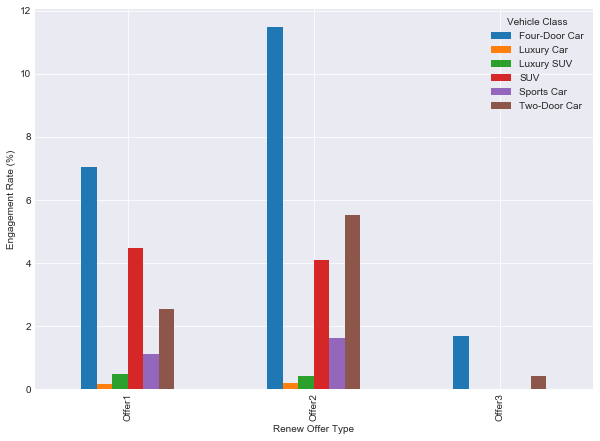

In [29]:
ax = (by_offer_type_df*100.0).plot(
kind='bar',
figsize=(10, 7),
grid=True
)
ax.set_ylabel('Engagement Rate (%)')
plt.show()

In [38]:
by_sales_channel_df = df.loc[
df['Response'] == 'Yes'
].groupby([
'Sales Channel'
]).count()['Customer']/df.groupby('Sales Channel').count()['Customer']

by_sales_channel_df

Sales Channel
Agent          0.191544
Branch         0.114531
Call Center    0.108782
Web            0.117736
Name: Customer, dtype: float64

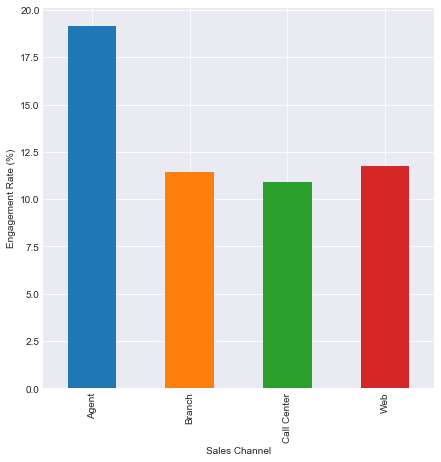

In [42]:
ax = (by_sales_channel_df*100.0).plot(
kind='bar',
figsize=(7, 7))
ax.set_ylabel('Engagement Rate (%)')
plt.show()

From the above figure, Agents bring out more responses from the customers.
Web works the second best for the same. To get more deep insights lets analyze sales channel and vehicle type and check how customers with different vehicle types responded with different sales channel.

## Sales Channel and Vehicle Type

In [43]:
by_sales_channel_df = df.loc[
df['Response'] == 'Yes'
].groupby([
'Sales Channel', 'Vehicle Size'
]).count()['Customer'] / df.groupby('Sales Channel').count()['Customer']
by_sales_channel_df

Sales Channel  Vehicle Size
Agent          Large           0.020708
               Medsize         0.144953
               Small           0.025884
Branch         Large           0.021036
               Medsize         0.074795
               Small           0.018699
Call Center    Large           0.013598
               Medsize         0.067989
               Small           0.027195
Web            Large           0.013585
               Medsize         0.095094
               Small           0.009057
Name: Customer, dtype: float64

In [44]:
by_sales_channel_df = by_sales_channel_df.unstack().fillna(0)
by_sales_channel_df

Vehicle Size,Large,Medsize,Small
Sales Channel,,,
Agent,0.020708,0.144953,0.025884
Branch,0.021036,0.074795,0.018699
Call Center,0.013598,0.067989,0.027195
Web,0.013585,0.095094,0.009057


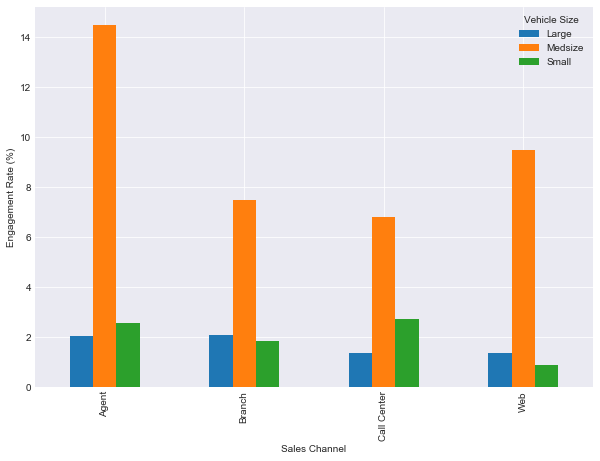

In [45]:
ax = (by_sales_channel_df*100.0).plot(
kind='bar',
figsize=(10, 7))
ax.set_ylabel('Engagement Rate (%)')
plt.show()

As we can see, customers with medium size vehicles respond the best to all sales channels
whereas the other customers differs slightly in terms of engagement rates across different sales
channels.

## Engagement Rates by Months Since Policy Inception

In [49]:
by_months_since_inception_df = df.loc[
df['Response'] == 'Yes'
].groupby(
by='Months Since Policy Inception'
)['Response'].count() / df.groupby(
by='Months Since Policy Inception'
)['Response'].count() * 100.0

by_months_since_inception_df.fillna(0).head(10)

Months Since Policy Inception
0    14.457831
1    14.117647
2    20.224719
3    26.315789
4    19.780220
5     6.896552
6     0.000000
7     7.594937
8     7.407407
9    18.750000
Name: Response, dtype: float64

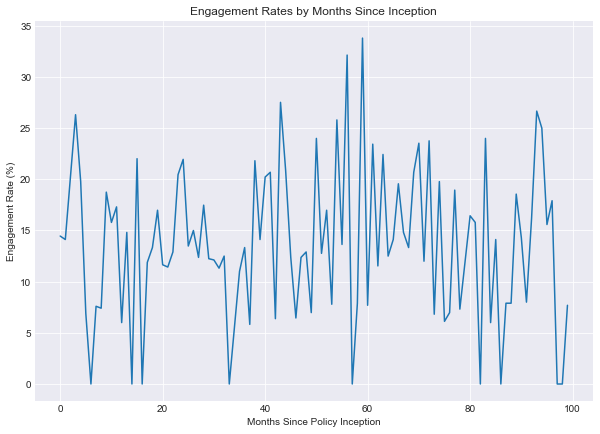

In [66]:
ax = by_months_since_inception_df.fillna(0).plot(
figsize=(10, 7),
title='Engagement Rates by Months Since Inception',
grid=True)
ax.set_xlabel('Months Since Policy Inception')
ax.set_ylabel('Engagement Rate (%)')
plt.show()

## Customer Segmentation by CLV & Months Since Policy Inception

In [67]:
df['Customer Lifetime Value'].describe()

count     9134.000000
mean      8004.940475
std       6870.967608
min       1898.007675
25%       3994.251794
50%       5780.182197
75%       8962.167041
max      83325.381190
Name: Customer Lifetime Value, dtype: float64

Defining those customers with a CLV higher than the
median as high-CLV customers, and those with a CLV lower than the median as low-CLV customers.

In [69]:
df['CLV Segment'] = df['Customer Lifetime Value']\
.apply(lambda x: 'High' if x > df['Customer Lifetime Value'].median() else 'Low')

In [71]:
df['Months Since Policy Inception'].describe()

count    9134.000000
mean       48.064594
std        27.905991
min         0.000000
25%        24.000000
50%        48.000000
75%        71.000000
max        99.000000
Name: Months Since Policy Inception, dtype: float64

In [72]:
df['Policy Age Segment'] = df['Months Since Policy Inception']\
.apply(lambda x: 'High' if x > df['Months Since Policy Inception'].median() else 'Low')

In [77]:
df[['Customer', 'Customer Lifetime Value','CLV Segment', 'Months Since Policy Inception', 'Policy Age Segment']].head(10)

,Customer,Customer Lifetime Value,CLV Segment,Months Since Policy Inception,Policy Age Segment
0,BU79786,2763.519279,Low,5,Low
1,QZ44356,6979.535903,High,42,Low
2,AI49188,12887.431650,High,38,Low
3,WW63253,7645.861827,High,65,High
4,HB64268,2813.692575,Low,44,Low
5,OC83172,8256.297800,High,94,High
6,XZ87318,5380.898636,Low,13,Low
7,CF85061,7216.100311,High,68,High
8,DY87989,24127.504020,High,3,Low
9,BQ94931,7388.178085,High,7,Low


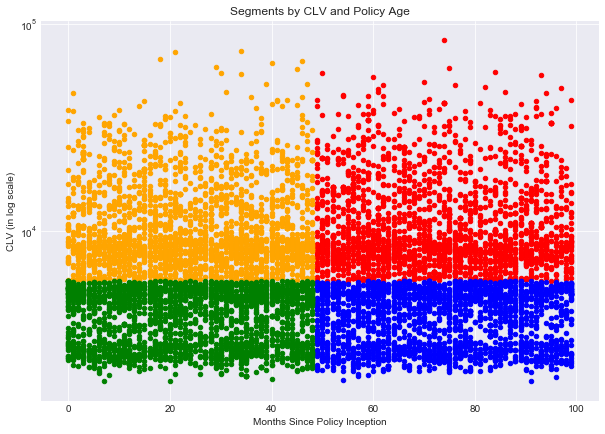

In [78]:
ax = df.loc[
(df['CLV Segment'] == 'High') & (df['Policy Age Segment'] == 'High')
].plot.scatter(
x='Months Since Policy Inception',
y='Customer Lifetime Value',
logy=True,
color='red')

df.loc[
(df['CLV Segment'] == 'Low') & (df['Policy Age Segment'] == 'High')
].plot.scatter(
ax=ax,
x='Months Since Policy Inception',
y='Customer Lifetime Value',
logy=True,
color='blue')

df.loc[
(df['CLV Segment'] == 'High') & (df['Policy Age Segment'] == 'Low')
].plot.scatter(
ax=ax,
x='Months Since Policy Inception',
y='Customer Lifetime Value',
logy=True,
color='orange')

df.loc[
(df['CLV Segment'] == 'Low') & (df['Policy Age Segment'] == 'Low')
].plot.scatter(
ax=ax,
x='Months Since Policy Inception',
y='Customer Lifetime Value',
logy=True,
color='green',
grid=True,
figsize=(10, 7))

ax.set_ylabel('CLV (in log scale)')
ax.set_xlabel('Months Since Policy Inception')
ax.set_title('Segments by CLV and Policy Age')
plt.show()

## Engagement Rates by the Segments

In [80]:
engagement_rates_by_segment_df = df.loc[
df['Response'] == 'Yes'
].groupby([
'CLV Segment', 'Policy Age Segment'
]). count()['Customer'] / df.groupby([
'CLV Segment', 'Policy Age Segment'
]).count()['Customer']
engagement_rates_by_segment_df

CLV Segment  Policy Age Segment
High         High                  0.138728
             Low                   0.132067
Low          High                  0.162450
             Low                   0.139957
Name: Customer, dtype: float64

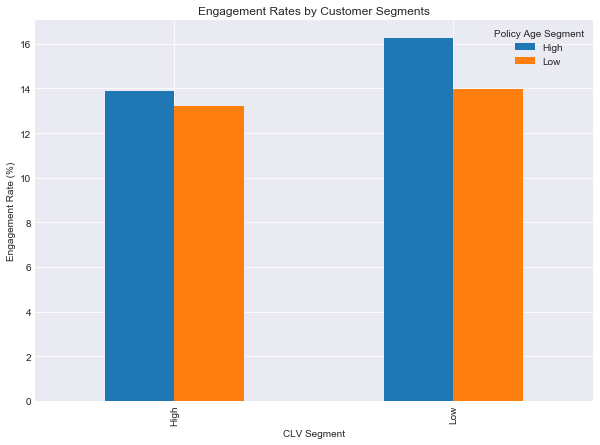

In [82]:
ax = (engagement_rates_by_segment_df.unstack()*100.0).plot(
kind='bar',
figsize=(10, 7),
grid=True)
ax.set_ylabel('Engagement Rate (%)')
ax.set_title('Engagement Rates by Customer Segments')
plt.show()

In the above figure, <b>High Policy Age Segment has higher engagement than the Low Policy Age
Segment. This suggests that those customers who have been insured by this company longer respond
better. Moreover, the High Policy Age and Low CLV segment has the highest engagement
rate among the four segments.

<b><i>By creating different customer segments based on customer attributes, we can better understand
how different groups of customers behave differently, and consequently, use this information
to customize the marketing messagges.